Kevin Armbruster - 930519-T711
xxx

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import maze_q_learning as qmz
import pandas as pd

In [4]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key to exit of the Maze

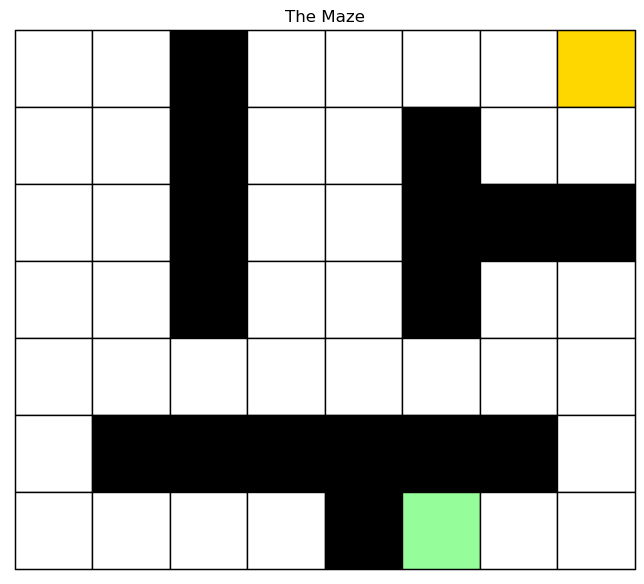

In [5]:
qmz.draw_maze(maze)

In [6]:
env = qmz.QLearningMaze(maze, minotaur_can_stay=False)
Q = env.episodic_online_q_learning()
display(pd.DataFrame(Q))

,0,1,2,3,4
0,-3.556797e+07,-3.556843e+07,-3.556786e+07,-3.556797e+07,-3.556844e+07
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...
2235,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2236,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2237,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2238,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


0.0